#Gekoppelte Pendel: Frequenzspektrum
#### Jens Wagner 06/2015
<a  href="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/Pendel.ipynb"<font> Download this notebook</font></a><br>
<a  href="http://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/data/Pendel.txt"<font> Download Pendel.txt</font></a>


In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
%matplotlib inline

In [2]:
np.genfromtxt('data/Pendel.txt',skip_header=2)  #Hier der Pfad zu Euren Daten eintragen 

array([[  2.50000000e-02,   2.10000000e-01,  -3.64500000e+00],
       [  5.00000000e-02,  -7.87500000e+00,   2.67000000e-01],
       [  1.23000000e-01,  -9.69500000e+00,   1.92000000e+00],
       ..., 
       [  1.98632000e+02,  -3.25500000e+00,   2.09000000e+00],
       [  1.98657000e+02,  -2.73000000e+00,   2.11400000e+00],
       [  1.98722000e+02,  -2.10000000e+00,   2.38100000e+00]])

In [3]:
#1. Spalte: Zeit
#2. Spalte: linkes Pendel
#3. Spalte: rechtes Pendel
zeit=np.genfromtxt('data/Pendel.txt',skip_header=2,usecols=(0))
linkes_Pendel=np.genfromtxt('data/Pendel.txt',skip_header=2,usecols=(1))

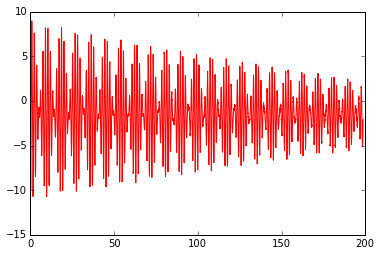

In [4]:
plt.plot(zeit, linkes_Pendel, color='red')
plt.show()

In [5]:
#Berechnung des mittleren Zeitschritts
#Wird fuer die Berechnung der Frequenz bei FFT benoetigt
dt=np.array([])
for i in range(len(zeit)-1): 
    dt=np.append( dt,zeit[i+1]-zeit[i])
timestep=np.mean(dt)
print(timestep)

0.0250248110831


In [6]:
spektrum = np.fft.fft(linkes_Pendel)  #Fouriertransformation
freq = np.fft.fftfreq(spektrum.size, timestep)

In [7]:
spektrum_shifted = np.fft.fftshift(spektrum)  #Umsortieren
freq_shifted = np.fft.fftshift(freq)

In [8]:
n=spektrum.size   #Nur positive Werte
n_halb = np.ceil(n/2.0)
spektrum_halb = (2.0 / n) * spektrum[0:n_halb]
freq_halb = freq[0:n_halb]

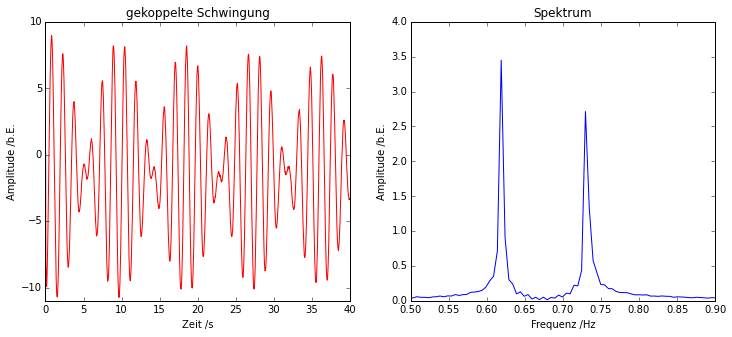

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(zeit, linkes_Pendel, color='red')
plt.xlabel("Zeit /s")
plt.ylabel("Amplitude /b.E.")
plt.title('gekoppelte Schwingung')
plt.axis([0, 40, -11, 10])

plt.subplot(122)
plt.plot(freq_halb, np.abs(spektrum_halb))
plt.xlabel("Frequenz /Hz")
plt.ylabel("Amplitude /b.E.")
plt.axis([0.5, 0.9, 0, 4])
plt.title('Spektrum')